In [1]:
import pandas as pd
data=pd.read_csv("/content/PremierLeagueSeason2024.csv")
print(data)

                        team  goals_scored  goals_conceded  wins  draws  \
0            Manchester City           179              66    55     12   
1                  Liverpool           154              83    44     19   
2                    Arsenal           146              68    46     12   
3          Manchester United           130             102    39     17   
4                    Chelsea           135              99    37     19   
5          Tottenham Hotspur           142             106    38     14   
6                Aston Villa           131             107    36     15   
7            West Ham United           122             121    33     18   
8                    Everton            87              99    30     17   
9           Newcastle United           131             124    30     15   
10            Crystal Palace            98             124    25     18   
11   Wolverhampton Wanderers            86             117    25     16   
12  Brighton and Hove Alb

In [2]:
data.isna().sum()

team               0
goals_scored       0
goals_conceded     0
wins               0
draws              0
losses             0
points             0
goal_difference    0
rank               0
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["team"]=b.fit_transform(data["team"])
print(data)

    team  goals_scored  goals_conceded  wins  draws  losses  points  \
0     14           179              66    55     12       9     177   
1     12           154              83    44     19      13     151   
2      0           146              68    46     12      18     150   
3     15           130             102    39     17      20     134   
4      6           135              99    37     19      20     130   
5     20           142             106    38     14      24     128   
6      1           131             107    36     15      25     123   
7     22           122             121    33     18      25     117   
8      8            87              99    30     17      29     107   
9     16           131             124    30     15      31     105   
10     7            98             124    25     18      33      93   
11    23            86             117    25     16      35      91   
12     4            95             108    21     26      29      89   
13    

In [5]:
x=data.drop("rank",axis=1)
y=data["rank"]

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

    team  goals_scored  goals_conceded  wins  draws  losses  points  \
11    23            86             117    25     16      35      91   
0     14           179              66    55     12       9     177   
8      8            87              99    30     17      29     107   
21    17            49              67     9      9      20      36   
23    21            35              76     5     11      22      26   
20    18            55             167    10      9      57      39   
6      1           131             107    36     15      25     123   
18    19            47              68    12      7      19      43   
14    11            68              50    20      6      12      66   
3     15           130             102    39     17      20     134   
5     20           142             106    38     14      24     128   
16    10            62              54    18      5      15      59   
13     9            82             114    18     21      37      75   
17    

In [8]:
from sklearn.linear_model import LinearRegression
br=LinearRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtrain)

In [9]:
c=br.predict([[23,180,73,54,13,10,156,145]])
print(c)

[4.50852071]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 2.],
        [0., 0., 0., 0., 0., 0., 1., 1., 2., 1.],
        [0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 1., 2., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([ 35. ,  49.4,  63.8,  78.2,  92.6, 107. , 121.4, 135.8, 150.2,
        164.6, 179. ]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <matplotlib.collections.QuadMesh at 0x7d94900c1790>)

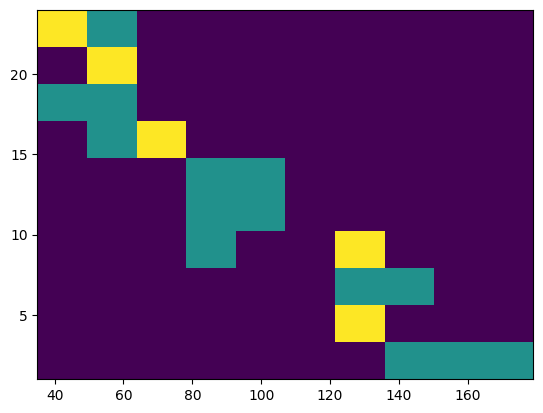

In [10]:
from matplotlib import pyplot as plt
plt.hist2d(data["goals_scored"],data["rank"])